# Dubai Real Estate Case

**Table of Contents**

1. **Introduction**
   - Overview of the Project
   - Dataset Description
   - Goals and Objectives

2. **Data Exploration and Cleaning**
   - Loading the Dataset
   - Handling Missing Values
   - Data Types and Conversion
   - Exploratory Data Analysis (EDA)

3. **Case Study 1: Predicting Rental Prices**
   - Feature Selection and Engineering
   - Model 1: Multiple Linear Regression
   - Model 2: Random Forest Regression
   - Model Evaluation and Comparison
   - Interpretation of Results

4. **Case Study 2: Identifying Optimal Property Types by Region**
   - Clustering Regions Based on Geographical Data
   - Analysis of Property Types by Cluster
   - Visualization with Folium and GeoPandas
   - Insights for Real Estate Developers

5. **Conclusion**
   - Summary of Findings
   - Business Implications
   - Next Steps and Future Work

Overview of the Project

This project analyzes Dubai's rental property market using a detailed dataset. The analysis focuses on predicting rental prices with machine learning models and identifying the most profitable property types across different regions.
Dataset Description

The dataset, sourced from Kaggle, includes key information on Dubai's rental properties such as property type, size, rental price, and location. It provides a solid foundation for both predictive modeling and geographic analysis.
Goals and Objectives

The project's main goals are:

- Predicting Rental Prices: Develop and compare machine learning models to forecast rental prices based on property characteristics.
- Identifying Optimal Property Types by Region: Analyze and visualize which property types generate the highest revenue per square foot in different regions, offering valuable insights for real estate developers.

In [4]:
## Import Data from single csv file and import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pip install folium geopandas #(if not installed)


# Load the Dubai real estate dataset
df = pd.read_csv('data/dubai_properties.csv')
df_sampled = df.sample(n=100, random_state=42)



# 1. Data Exploration and Cleaning

In [6]:
print(df.info()) #datatypes
print(df.describe()) # analysis numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

The dataset is extensive, with 73,742 entries and 17 variables, providing a rich source for analysis. While most variables are complete, slight missing data in latitude and longitude suggests some geographical records may need attention during analysis.

In [8]:
# Numerical variables of interest
numerical_vars = ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']

# Group by 'Rent_category' and calculate the mean values
grouped_means = df.groupby('Rent_category')[numerical_vars].mean()

# Display the table
print("Table of mean values by Rent_category:")
print(grouped_means)

# Group by 'Type' and calculate the mean values
grouped_means_type = df.groupby('Type')[numerical_vars].mean()

# Display the table
print("Table of mean values by Type:")
print(grouped_means_type)

# Group by 'Furnishing' and calculate the mean values
grouped_means_furnishing = df.groupby('Furnishing')[numerical_vars].mean()

# Display the table
print("Table of mean values by Furnishing:")
print(grouped_means_furnishing)

# Group by 'Purpose' and calculate the mean values
grouped_means_purpose = df.groupby('Purpose')[numerical_vars].mean()

# Display the table
print("Table of mean values by Purpose:")
print(grouped_means_purpose)


# Table by Type
print("\nTable of mean values by Type:")
print(grouped_means_type)

# Table by Furnishing
print("\nTable of mean values by Furnishing:")
print(grouped_means_furnishing)



Table of mean values by Rent_category:
                        Rent      Beds     Baths  Area_in_sqft  Rent_per_sqft
Rent_category                                                                
High           302797.554964  3.237801  3.176916   3388.907854     124.835735
Low             41534.087062  1.093537  1.792016   1020.708129      52.952852
Medium         100080.856983  2.150430  2.967235   1754.138752      86.206207
Table of mean values by Type:
                              Rent      Beds     Baths  Area_in_sqft  \
Type                                                                   
Apartment             1.096384e+05  1.555666  2.176000   1222.383769   
Hotel Apartment       2.257042e+05  1.511828  1.982796   1153.488172   
Penthouse             4.811372e+05  3.348148  3.140741   4842.800000   
Residential Building  2.866282e+06  8.840909  7.772727  23143.863636   
Residential Floor     1.409327e+06  3.000000  2.083333   9552.083333   
Residential Plot      2.996498e+05  2

The analysis reveals distinct patterns across different categories and property types. High-rent properties tend to have larger sizes and more bedrooms, with higher `Rent_per_sqft`, particularly in the "High" Rent_category. Among property types, **Hotel Apartments** command the highest rent per square foot, followed by **Residential Buildings** and **Penthouses**, indicating their premium status in the market. **Apartments** and **Townhouses** are more moderately priced but are the most common types, reflecting broader accessibility. Furnished properties generally have higher `Rent_per_sqft` than unfurnished ones, likely due to the added convenience they offer. This information is particularly valuable for developers or investors looking to maximize returns by selecting the right property type in specific market segments. This insight will be essential for the second use case, where the focus is on determining the most profitable property types by location in Dubai.

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64


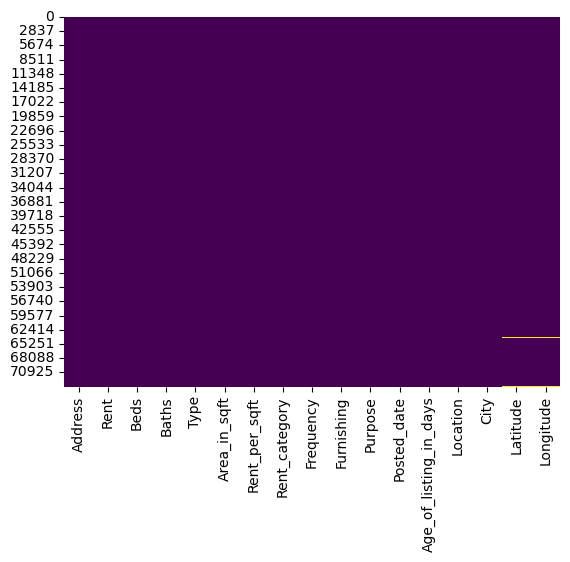

In [10]:
## missing values
# Überprüfen, ob fehlende Werte vorhanden sind
missing_values = df.isnull().sum()
print(missing_values)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

The dataset is highly complete, with only 719 missing values in the Latitude and Longitude columns out of over 73,000 entries. This minimal amount of missing geographical data should have a limited impact on the overall analysis, but may require attention depending on the importance of spatial analysis in the project.

In [12]:
#creating a simple map to understand the geograpfical dimensions

import folium
import pandas as pd
import numpy as np
from folium import plugins

# Beispiel: 100 zufällige Datensätze aus dem ursprünglichen DataFrame ziehen
df_sampled = df.sample(n=100, random_state=42)

# Erstelle eine Funktion zur Umwandlung von Werten in Farben
def color_producer(value):
    if value < df_sampled['Rent_per_sqft'].quantile(0.25):
        return 'green'
    elif value < df_sampled['Rent_per_sqft'].quantile(0.5):
        return 'yellow'
    elif value < df_sampled['Rent_per_sqft'].quantile(0.75):
        return 'orange'
    else:
        return 'red'

# Erstelle eine Karte, zentriert auf Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=10)  # Dubai

# Durch den neuen DataFrame mit den 100 zufälligen Datensätzen iterieren und farbcodierte Punkte auf der Karte platzieren
for idx, row in df_sampled.iterrows():
    # Überprüfen, ob sowohl Latitude als auch Longitude vorhanden sind
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  # Größe des Punktes
            color=color_producer(row['Rent_per_sqft']),
            fill=True,
            fill_color=color_producer(row['Rent_per_sqft']),
            fill_opacity=0.7
        ).add_to(m)

# Speichern der Karte
m.save('dubai_rent_per_sqft_map.html')

# Zeige die Karte an
m


This first map visualizes general rental prices across different regions in Dubai, with each point representing a specific location. The color gradient from green to red indicates the rent levels, where green represents lower rents and red indicates higher rents, providing a clear geographical overview of the rental market distribution.

Variable: Rent
Mean: 147925.00
Std. Deviation: 306965.83
Min: 0.00
25%: 54999.00
50% (Median): 98000.00
75%: 170000.00
Max: 55000000.00




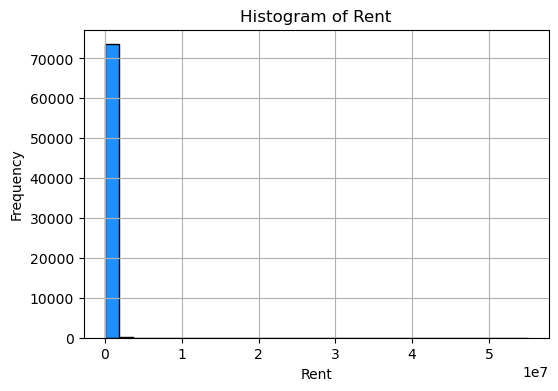

Variable: Beds
Mean: 2.16
Std. Deviation: 1.58
Min: 0.00
25%: 1.00
50% (Median): 2.00
75%: 3.00
Max: 12.00




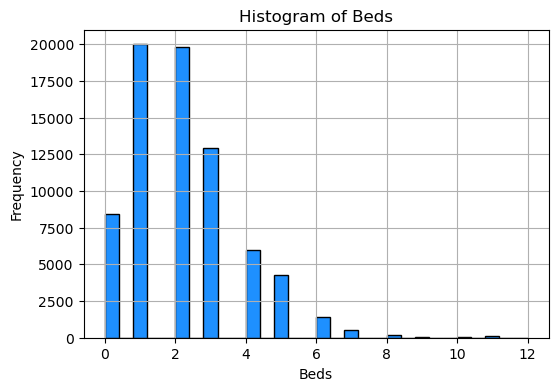

Variable: Baths
Mean: 2.65
Std. Deviation: 1.63
Min: 1.00
25%: 2.00
50% (Median): 2.00
75%: 3.00
Max: 11.00




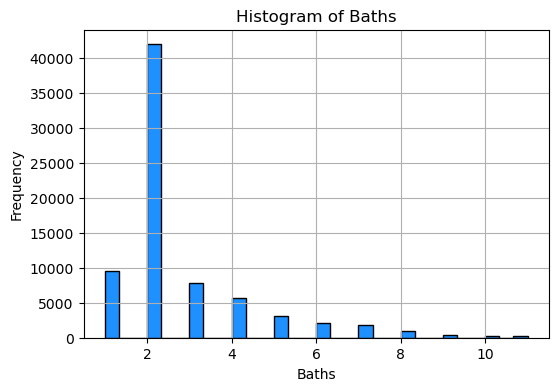

Variable: Area_in_sqft
Mean: 2054.05
Std. Deviation: 3003.92
Min: 74.00
25%: 850.00
50% (Median): 1334.00
75%: 2130.00
Max: 210254.00




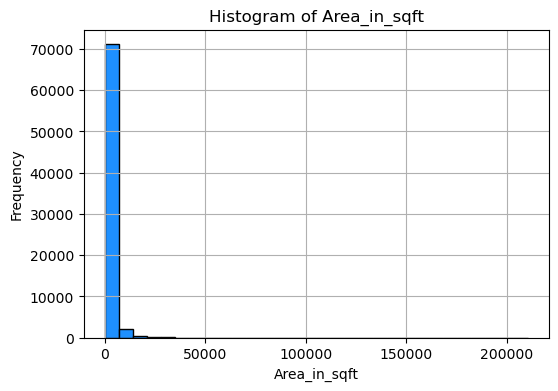

Variable: Rent_per_sqft
Mean: 88.06
Std. Deviation: 66.53
Min: 0.00
25%: 39.98
50% (Median): 71.43
75%: 118.48
Max: 2182.04




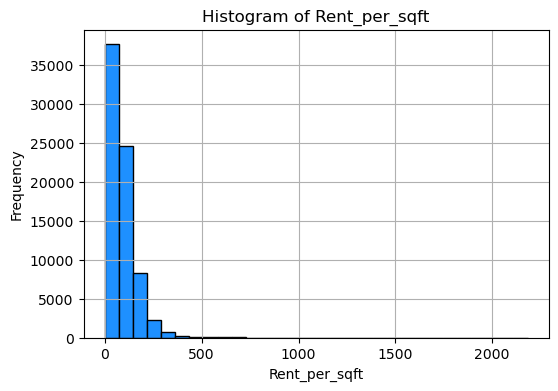

Variable: Age_of_listing_in_days
Mean: 74.26
Std. Deviation: 72.35
Min: 11.00
25%: 30.00
50% (Median): 52.00
75%: 95.00
Max: 2276.00




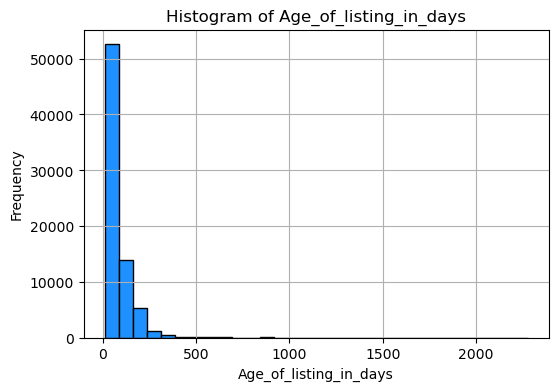

Variable: Latitude
Mean: 24.92
Std. Deviation: 0.57
Min: 15.18
25%: 24.49
50% (Median): 25.08
75%: 25.20
Max: 25.92




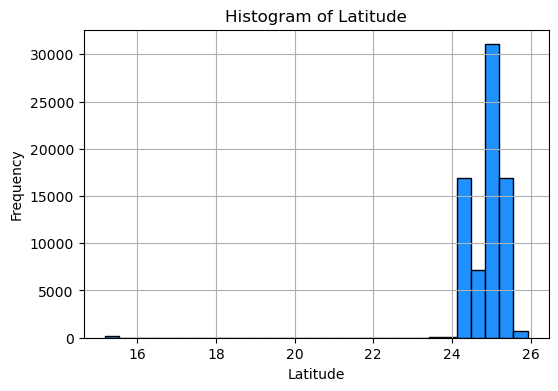

Variable: Longitude
Mean: 55.05
Std. Deviation: 0.65
Min: 43.35
25%: 54.61
50% (Median): 55.24
75%: 55.37
Max: 56.36




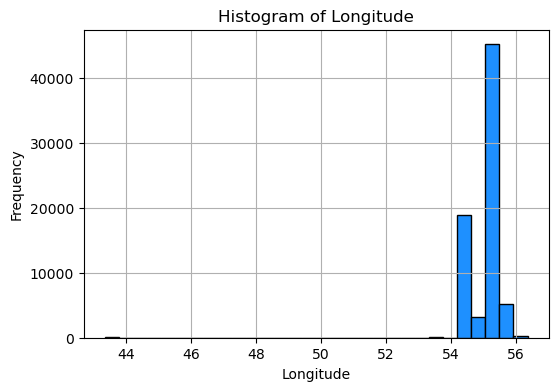

In [14]:
## Creating plots for a better understanding

import pandas as pd
import matplotlib.pyplot as plt

# Numerische Variablen identifizieren
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Iteriere über jede numerische Variable und erstelle die Ausgabe
for var in numerical_vars:
    print(f"Variable: {var}")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Std. Deviation: {df[var].std():.2f}")
    print(f"Min: {df[var].min():.2f}")
    print(f"25%: {df[var].quantile(0.25):.2f}")
    print(f"50% (Median): {df[var].median():.2f}")
    print(f"75%: {df[var].quantile(0.75):.2f}")
    print(f"Max: {df[var].max():.2f}")
    print("\n")
    
    # Histogramm erstellen
    plt.figure(figsize=(6, 4))
    plt.hist(df[var], bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


The summary statistics reveal that while most variables like *Beds* and *Baths* have reasonable ranges, the *Area_in_sqft* variable exhibits extreme outliers, with a maximum value significantly higher than the upper quartile. Specifically, any value above 50,000 square feet likely represents an outlier that could distort the analysis, suggesting the need to filter these extreme values for more accurate insights.

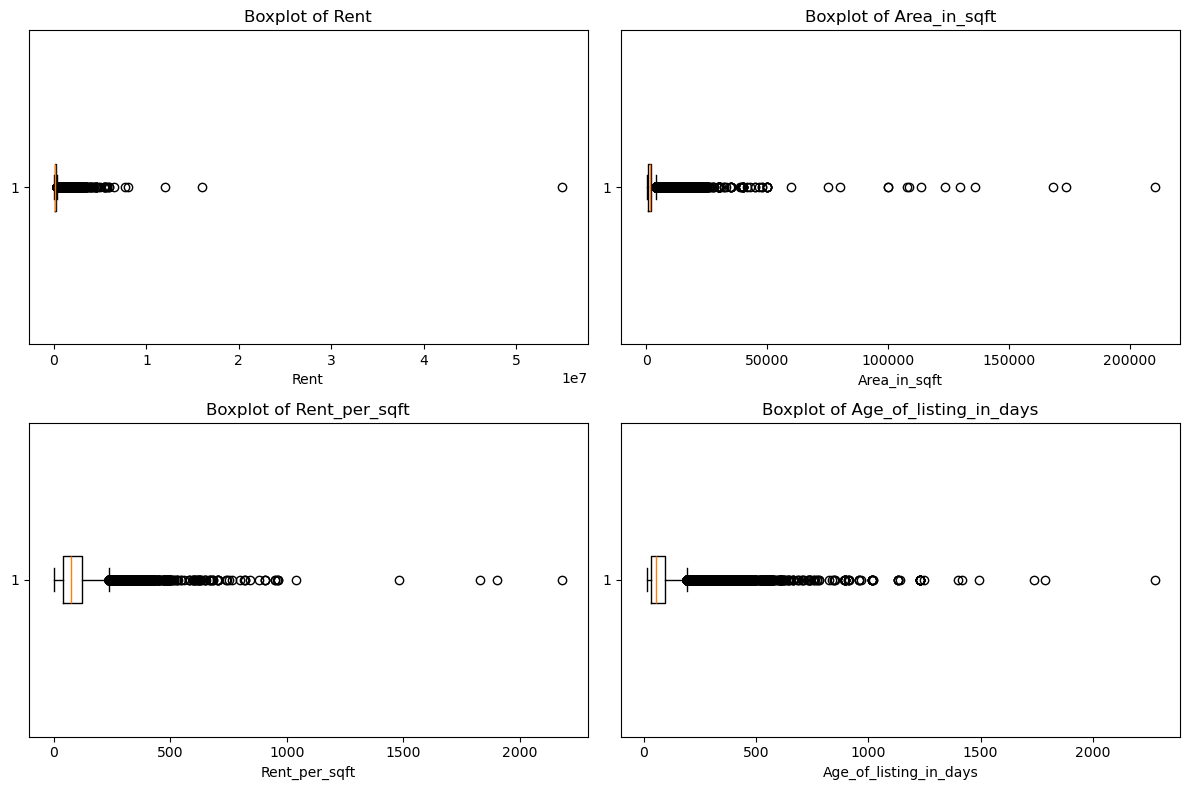

In [16]:
## Data Cleaning

#Identify and Cleaning of data with missing values

import matplotlib.pyplot as plt

# List of variables
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Creating Boxplots
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[var].dropna(), vert=False)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

The box plots for *Area_in_sqft* and *Rent_per_sqft* indicate significant variability, with both variables showing considerable spread and the presence of outliers. These outliers suggest that there are extreme values in the dataset that could potentially skew the overall analysis, highlighting the need for careful examination or removal of these data points.

In [18]:
import numpy as np

# List of variables
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Z-Score calculation for the selected variables
z_scores = np.abs((df[variables] - df[variables].mean()) / df[variables].std())

# Setting a threshold (e.g., Z-Score > 3) to identify outliers
threshold = 3

# Counting the outliers for each variable
outlier_counts = (z_scores > threshold).sum()

# Calculating the percentage of outliers relative to the total number of data points
total_data_points = len(df)  # len gives the number of rows in the df
outlier_percentages = (outlier_counts / total_data_points) * 100

# Combining the outlier count and percentage into a DataFrame
outlier_summary = pd.DataFrame({
    'Outlier Count': outlier_counts,
    'Outlier Percentage': outlier_percentages
})

# Displaying the outlier count and percentage for each variable
print("Outlier Count and Percentage based on the Z-Score Method:")
print(outlier_summary)


Outlier Count and Percentage based on the Z-Score Method:
                        Outlier Count  Outlier Percentage
Rent                              611            0.828564
Area_in_sqft                     1092            1.480839
Rent_per_sqft                    1002            1.358791
Age_of_listing_in_days           1013            1.373708


The analysis shows that the data consist of many outliers, with Area_in_sqft having the highest outlier percentage at approximately 1.48%. While these percentages seem to be low, the presence of outliers could significantly impact the results, particularly in variables like Area_in_sqft where extreme values are more prevalent.

In [20]:
# Cleaning the dataset and creating df_cleaned by using z-score metric to identify outliers
import numpy as np

# List of variables to analyze
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Z-Score calculation for the selected variables
z_scores = np.abs((df[variables] - df[variables].mean()) / df[variables].std())

# Setting a threshold (e.g., Z-Score > 3) to identify outliers
threshold = 3

# Identifying outliers: True for outliers, False for non-outliers
outliers = (z_scores > threshold).any(axis=1)

# Removing outliers from the dataset
df_cleaned = df[~outliers]

## From the future 

# Removing all data points where Area_in_sqft is over 50,000
df_cleaned = df_cleaned[df_cleaned['Area_in_sqft'] <= 50000]

# Checking if the filtering worked
print(f"Number of remaining data points: {len(df_cleaned)}")
print(f"Maximum value of Area_in_sqft in the cleaned dataset: {df_cleaned['Area_in_sqft'].max()}")

# Output the number of removed outliers and the new number of data points
print(f"Number of removed outliers: {outliers.sum()}")
print(f"Number of remaining data points: {len(df_cleaned)}")

Number of remaining data points: 70436
Maximum value of Area_in_sqft in the cleaned dataset: 11039
Number of removed outliers: 3306
Number of remaining data points: 70436


After cleaning the dataset, 3,306 outliers were removed, resulting in 70,436 data points remaining. The maximum value of `Area_in_sqft` in the cleaned dataset is now 11,039, indicating that extreme values above the set threshold were successfully filtered out.

Variable: Rent
Mean: 126266.57
Std. Deviation: 110308.30
Min: 0.00
25%: 53000.00
50% (Median): 95000.00
75%: 160000.00
Max: 1050000.00




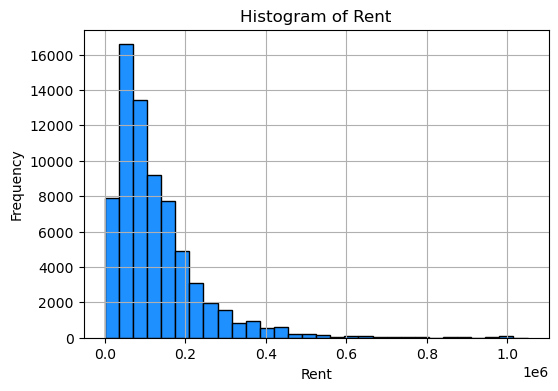

Variable: Beds
Mean: 2.09
Std. Deviation: 1.50
Min: 0.00
25%: 1.00
50% (Median): 2.00
75%: 3.00
Max: 12.00




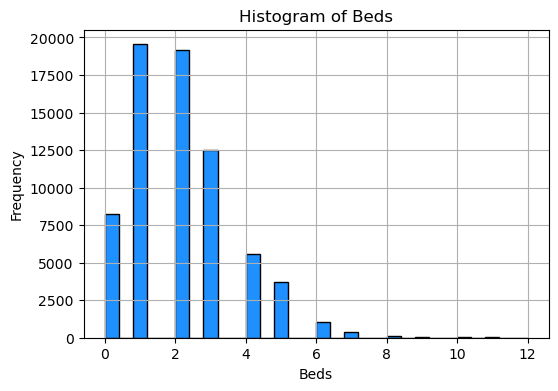

Variable: Baths
Mean: 2.62
Std. Deviation: 1.56
Min: 1.00
25%: 2.00
50% (Median): 2.00
75%: 3.00
Max: 11.00




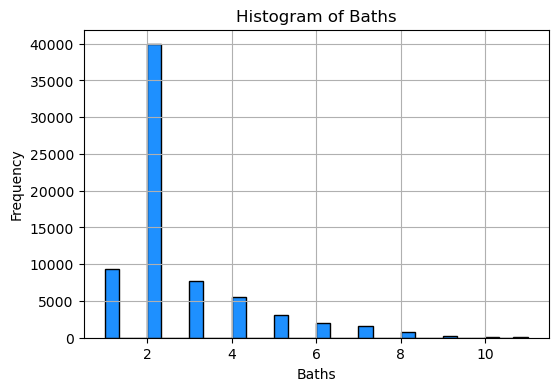

Variable: Area_in_sqft
Mean: 1805.12
Std. Deviation: 1604.04
Min: 140.00
25%: 850.00
50% (Median): 1300.00
75%: 2025.00
Max: 11039.00




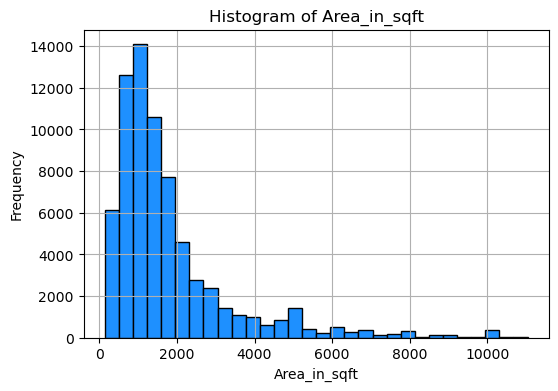

Variable: Rent_per_sqft
Mean: 84.84
Std. Deviation: 55.09
Min: 0.00
25%: 40.00
50% (Median): 71.43
75%: 116.87
Max: 287.63




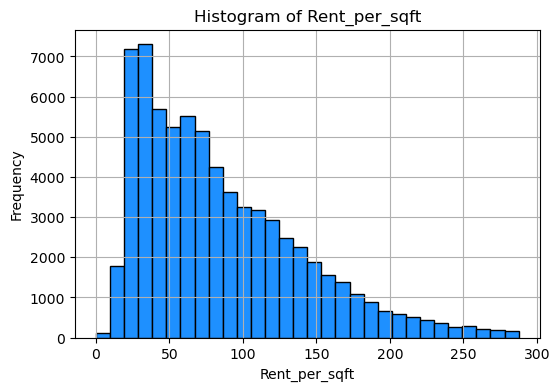

Variable: Age_of_listing_in_days
Mean: 69.04
Std. Deviation: 54.39
Min: 11.00
25%: 30.00
50% (Median): 50.00
75%: 93.00
Max: 291.00




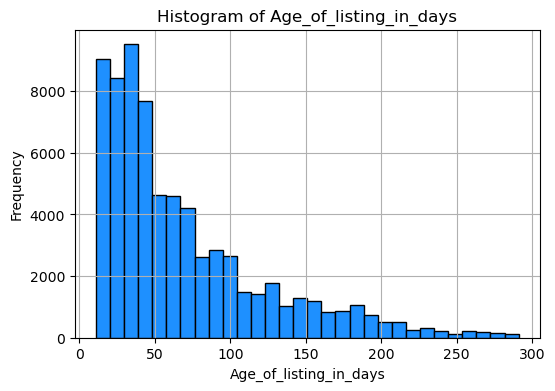

Variable: Latitude
Mean: 24.92
Std. Deviation: 0.58
Min: 15.18
25%: 24.49
50% (Median): 25.08
75%: 25.20
Max: 25.92




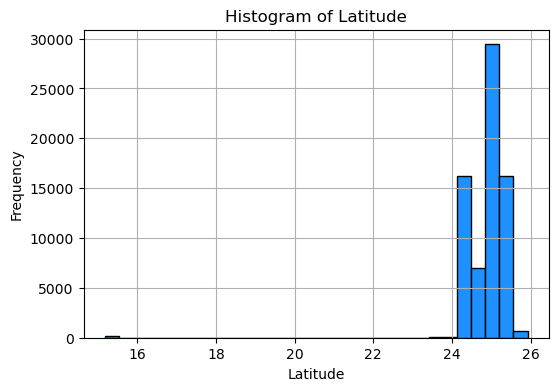

Variable: Longitude
Mean: 55.05
Std. Deviation: 0.66
Min: 43.35
25%: 54.61
50% (Median): 55.24
75%: 55.37
Max: 56.36




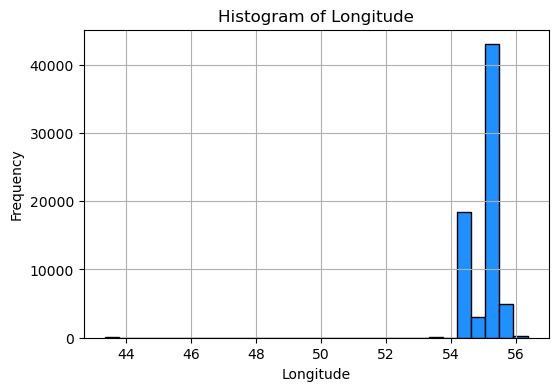

In [22]:
# Plotting the Data with df_cleaned

import pandas as pd
import matplotlib.pyplot as plt

# Identify numerical variables
numerical_vars = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Iterate over each numerical variable and display statistics
for var in numerical_vars:
    print(f"Variable: {var}")
    print(f"Mean: {df_cleaned[var].mean():.2f}")
    print(f"Std. Deviation: {df_cleaned[var].std():.2f}")
    print(f"Min: {df_cleaned[var].min():.2f}")
    print(f"25%: {df_cleaned[var].quantile(0.25):.2f}")
    print(f"50% (Median): {df_cleaned[var].median():.2f}")
    print(f"75%: {df_cleaned[var].quantile(0.75):.2f}")
    print(f"Max: {df_cleaned[var].max():.2f}")
    print("\n")
    
    # Create histogram
    plt.figure(figsize=(6, 4))
    plt.hist(df_cleaned[var], bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

The histograms show improved distributions after cleaning the data, with fewer extreme outliers, particularly in variables like `Area_in_sqft` and `Rent_per_sqft`. This cleaning process results in more accurate and reliable visualizations, providing a clearer understanding of the data's central tendencies and variability.

In [24]:
import pandas as pd

# List of variables to compare
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Create a DataFrame for comparison
comparison = pd.DataFrame(index=variables)

# Comparison for the original DataFrame (df)
comparison['Original_Count'] = df[variables].count()
comparison['Original_Mean'] = df[variables].mean()
comparison['Original_Max'] = df[variables].max()

# Comparison for the cleaned DataFrame (df_cleaned)
comparison['Cleaned_Count'] = df_cleaned[variables].count()
comparison['Cleaned_Mean'] = df_cleaned[variables].mean()
comparison['Cleaned_Max'] = df_cleaned[variables].max()

# Display the comparison
print("Comparison between Original and Cleaned DataFrames:")
print(comparison)



Comparison between Original and Cleaned DataFrames:
                        Original_Count  Original_Mean  Original_Max  \
Rent                             73742  147925.001668  5.500000e+07   
Area_in_sqft                     73742    2054.053552  2.102540e+05   
Rent_per_sqft                    73742      88.057754  2.182045e+03   
Age_of_listing_in_days           73742      74.261547  2.276000e+03   

                        Cleaned_Count   Cleaned_Mean   Cleaned_Max  
Rent                            70436  126266.572591  1.050000e+06  
Area_in_sqft                    70436    1805.124468  1.103900e+04  
Rent_per_sqft                   70436      84.838071  2.876318e+02  
Age_of_listing_in_days          70436      69.037495  2.910000e+02  


The data cleaning process significantly reduced extreme outliers, resulting in more realistic averages and maximum values across key variables like rent, area in square feet, and rent per square foot. This leads to a dataset that better represents typical properties, improving the reliability of subsequent analysis and model predictions.

# Exploratory Data Analysis (EDA)

Correlation matrix for the cleaned dataset:
                            Rent      Beds     Baths  Area_in_sqft  \
Rent                    1.000000  0.520338  0.210709      0.522283   
Beds                    0.520338  1.000000  0.763653      0.816566   
Baths                   0.210709  0.763653  1.000000      0.682971   
Area_in_sqft            0.522283  0.816566  0.682971      1.000000   
Rent_per_sqft           0.447058 -0.240183 -0.271359     -0.304152   
Age_of_listing_in_days  0.037305  0.085537  0.088653      0.067869   

                        Rent_per_sqft  Age_of_listing_in_days  
Rent                         0.447058                0.037305  
Beds                        -0.240183                0.085537  
Baths                       -0.271359                0.088653  
Area_in_sqft                -0.304152                0.067869  
Rent_per_sqft                1.000000               -0.046579  
Age_of_listing_in_days      -0.046579                1.000000  


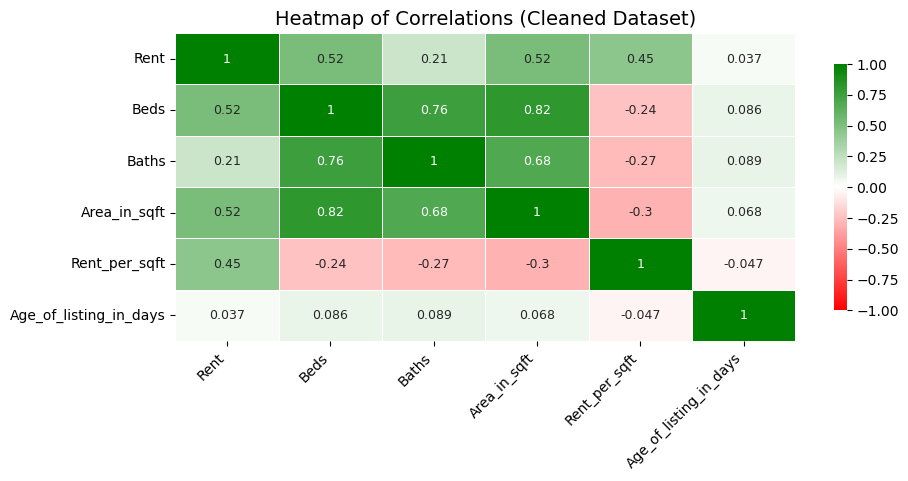

In [27]:
# Correlation Tables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selection of variables to analyze in the cleaned dataset
variables = ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Calculation of the correlation matrix in the cleaned dataset
correlation_matrix_cleaned = df_cleaned[variables].corr()

# Display the correlation matrix
print("Correlation matrix for the cleaned dataset:")
print(correlation_matrix_cleaned)

# Create a custom colormap with green for positive, red for negative, and white for neutral
from matplotlib.colors import LinearSegmentedColormap

# Define the custom colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['red', 'white', 'green'], N=256)

# Create a heatmap with the custom colormap and rectangular cells
plt.figure(figsize=(10, 4))  # Adjusted figure size for rectangular cells
sns.heatmap(
    correlation_matrix_cleaned,
    annot=True,
    cmap=cmap,  # Use the custom colormap
    vmin=-1,
    vmax=1,
    annot_kws={"size": 9},  # Adjust annotation size
    linewidths=.5,  # Thin lines between cells
    cbar_kws={"shrink": .8}  # Adjust the color bar size
)
plt.title('Heatmap of Correlations (Cleaned Dataset)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and resize x-axis labels
plt.yticks(fontsize=10)  # Resize y-axis labels
plt.show()

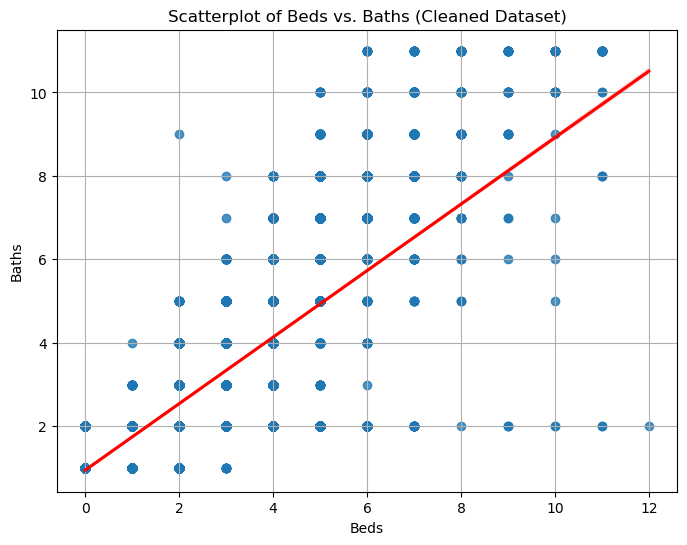

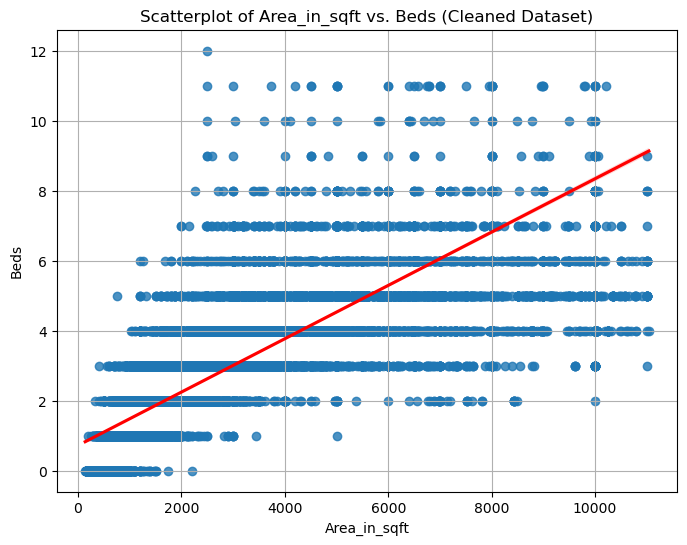

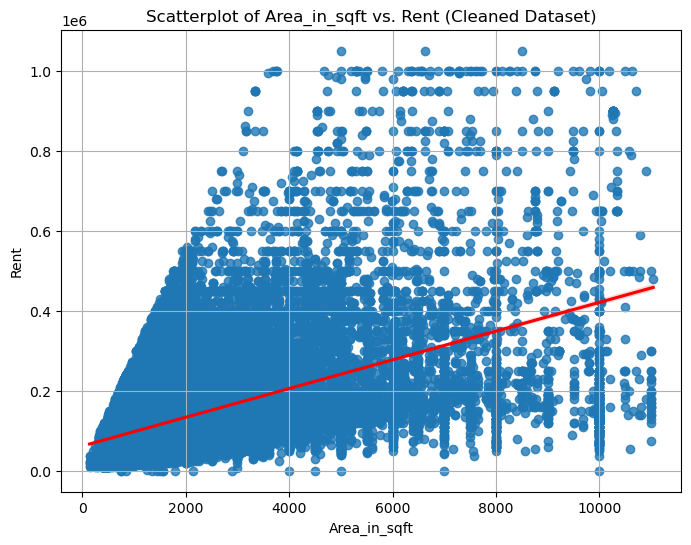

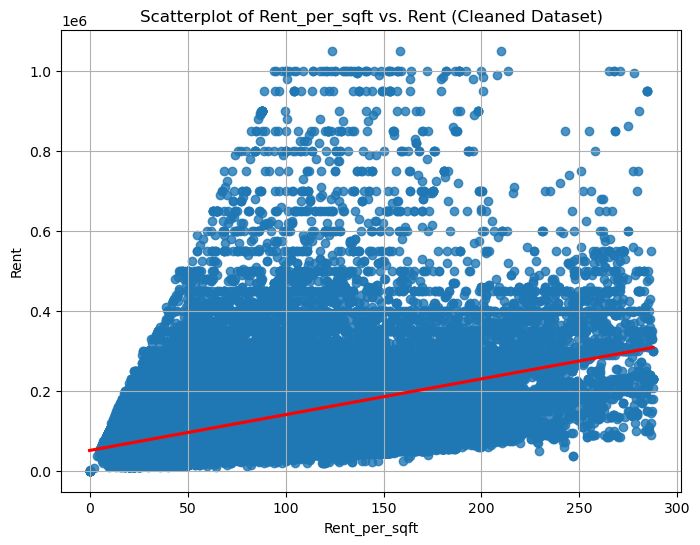

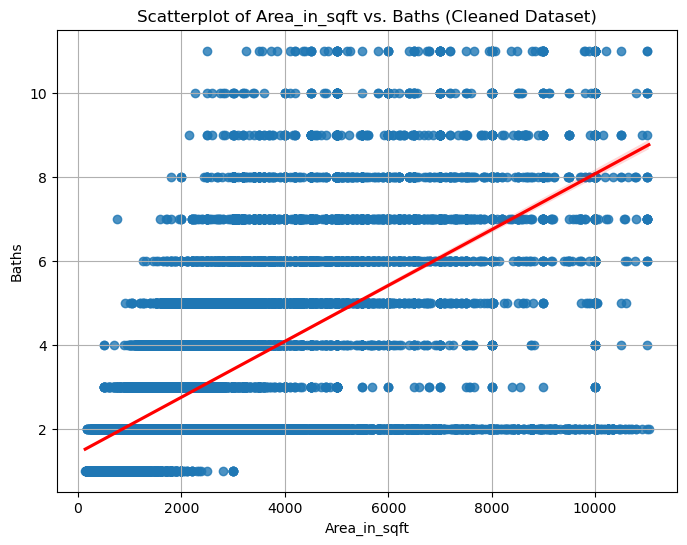

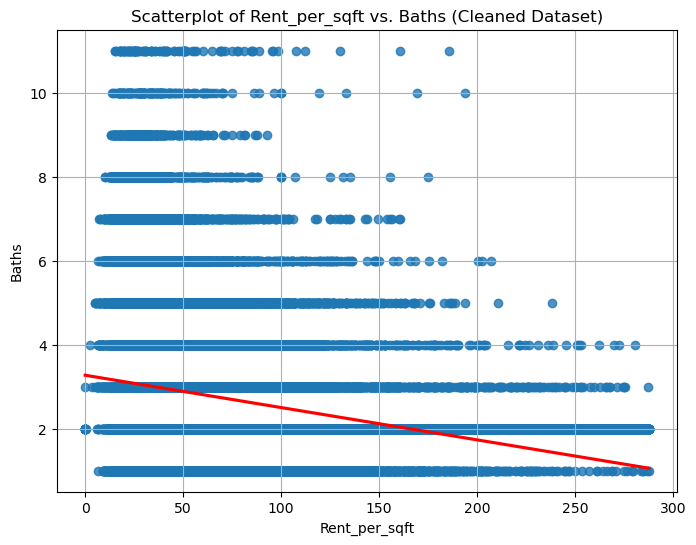

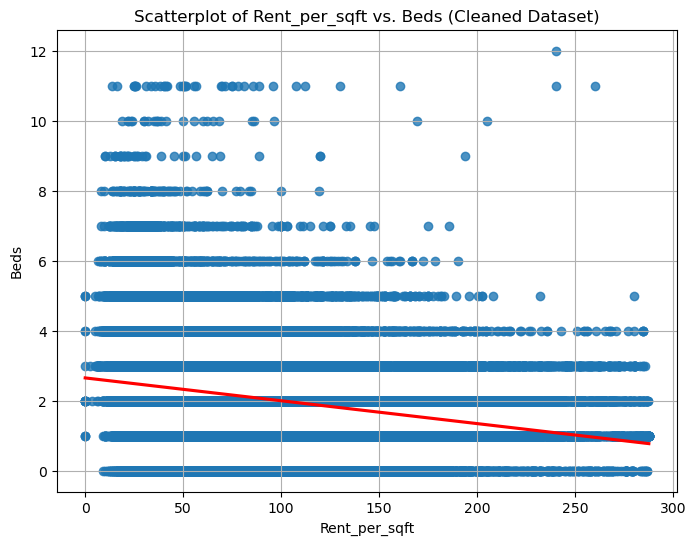

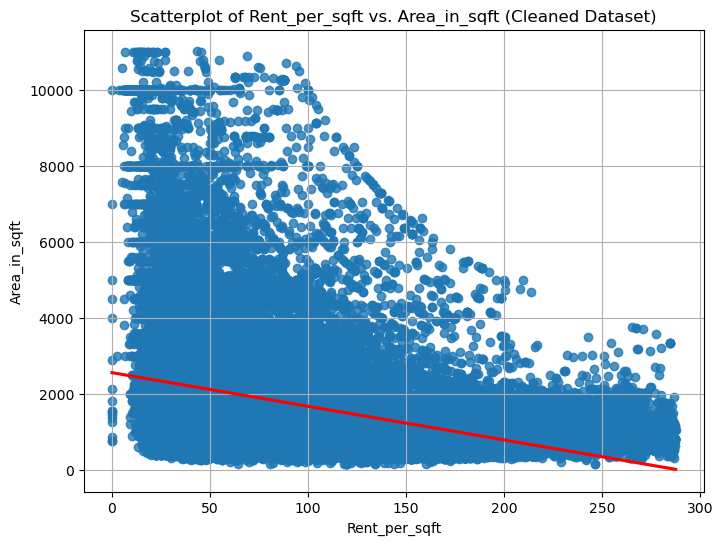

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variable pairs for moderate and negative correlations in the cleaned dataset
variable_pairs = [
    ('Beds', 'Baths'),                 # Strong positive correlation
    ('Area_in_sqft', 'Beds'),          # Strong positive correlation
    ('Area_in_sqft', 'Rent'),          # Moderate positive correlation
    ('Rent_per_sqft', 'Rent'),         # Moderate positive correlation
    ('Area_in_sqft', 'Baths'),         # Moderate positive correlation
    ('Rent_per_sqft', 'Baths'),        # Negative correlation
    ('Rent_per_sqft', 'Beds'),         # Negative correlation
    ('Rent_per_sqft', 'Area_in_sqft')  # Negative correlation
]

# Iterate over the pairs and create scatter plots with regression lines for the cleaned dataset
for var1, var2 in variable_pairs:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df_cleaned[var1], y=df_cleaned[var2], line_kws={"color": "red"})
    plt.title(f'Scatterplot of {var1} vs. {var2} (Cleaned Dataset)')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()


The scatter plots reveal strong correlations between several pairs of variables, indicating that they capture the distribution of data points well. This is especially evident in the relationships between `Rent` and other variables, where the data shows clear patterns. These strong correlations are a positive indicator, as they are crucial for regression models where `Rent` is the target variable (dependent variable). The ability of the predictor variables to explain variations in `Rent` enhances the potential effectiveness of the regression model.

In [30]:
## Understand the categorical variables

import pandas as pd

# Variables to be analyzed
variables_of_interest = ['Rent_category', 'Type', 'Furnishing', 'Purpose']

# Frequency analysis
for var in variables_of_interest:
    print(f"\nAnalysis for {var}:")
    print(df_cleaned[var].value_counts())
    print(f"\nMode (most frequent category): {df_cleaned[var].mode()[0]}")
    print(f"Number of unique values: {df_cleaned[var].nunique()}")



Analysis for Rent_category:
Rent_category
Medium    24701
Low       23627
High      22108
Name: count, dtype: int64

Mode (most frequent category): Medium
Number of unique values: 3

Analysis for Type:
Type
Apartment               54833
Villa                   11442
Townhouse                3402
Hotel Apartment           395
Penthouse                 243
Villa Compound             94
Residential Building       21
Residential Floor           3
Residential Plot            3
Name: count, dtype: int64

Mode (most frequent category): Apartment
Number of unique values: 9

Analysis for Furnishing:
Furnishing
Unfurnished    55760
Furnished      14676
Name: count, dtype: int64

Mode (most frequent category): Unfurnished
Number of unique values: 2

Analysis for Purpose:
Purpose
For Rent    70436
Name: count, dtype: int64

Mode (most frequent category): For Rent
Number of unique values: 1


The categorical analysis shows that the most common rental category is "Medium," with "Apartment" being the predominant property type. The dataset is largely skewed towards unfurnished properties, and all entries are exclusively for rent, indicating a focused market segment.

# Case Study 1: Predicting Rental Prices

Now that we have identified the relationships and structure within the data, we can focus on answering our primary question: how can we predict RENT prices in Dubai's real estate market? During our exploratory data analysis, we observed several correlations that could be adequately captured by linear regressions. The correlation matrix highlighted which variables are closely associated with RENT, suggesting they could serve as predictors for our target variable by explaining its variance in the dataset. As a first step, it is logical to implement a multiple linear regression model that incorporates these variables as predictors. We will then evaluate the model's performance to assess the accuracy of our RENT predictions.

In [34]:
# Correlations with variable RENT
# List of numeric varaibles
numerical_vars = ['Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Calculation of correlations r
numerical_correlations = df_cleaned[numerical_vars + ['Rent']].corr()['Rent'].sort_values(ascending=False)

print("Korrelationen der numerischen Variablen mit Rent:")
print(numerical_correlations)

# List of categorical varaibles updated and reduced to furnishing
categorical_vars = ['Furnishing']

# calculations of mean
for var in categorical_vars:
    grouped_means = df_cleaned.groupby(var)['Rent'].mean().sort_values(ascending=False)
    print(f"\nmean of variable RENT {var}:")
    print(grouped_means)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Calculation of ANOVA with every numerical variable
for var in categorical_vars:
    model = ols(f'Rent ~ C({var})', data=df_cleaned).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA für {var}:")
    print(anova_table)


Korrelationen der numerischen Variablen mit Rent:
Rent                      1.000000
Area_in_sqft              0.522283
Beds                      0.520338
Rent_per_sqft             0.447058
Baths                     0.210709
Age_of_listing_in_days    0.037305
Name: Rent, dtype: float64

mean of variable RENT Furnishing:
Furnishing
Furnished      161066.921845
Unfurnished    117107.140638
Name: Rent, dtype: float64

ANOVA für Furnishing:
                     sum_sq       df            F  PR(>F)
C(Furnishing)  2.245158e+13      1.0  1894.754389     0.0
Residual       8.345959e+14  70434.0          NaN     NaN


The recommended variables for the regression are `Area_in_sqft`, `Beds`, `Rent_per_sqft`, `Baths`, and `Furnishing` due to their strong correlations with rent and significant impact in the analysis. Vorsicht, die variable RENT per sqft hat eine hohe korrelation mit mit rent. aber dennoch 

Mean Squared Error (MSE): 6285102922.951426
R-squared (R²): 0.46272214434499204


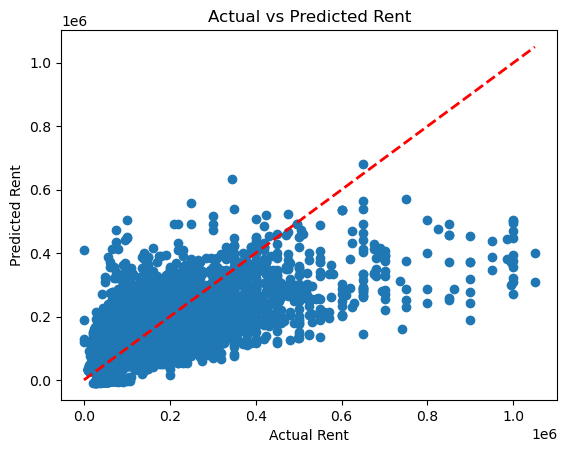

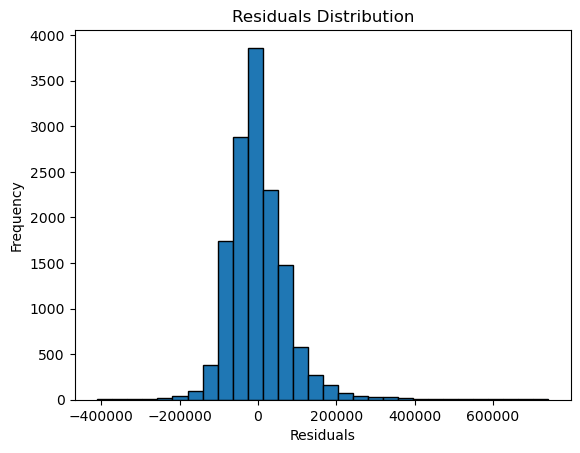

In [36]:
#m Model 1: Multple Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the relevant variables
X = df_cleaned[['Area_in_sqft', 'Beds', 'Baths', 'Furnishing']]
y = df_cleaned['Rent']

# One-Hot Encoding for the categorical variable (Furnishing)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Furnishing'])
    ], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Plotting the residuals
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()

# Histogram of the residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Comment: including the variable rent per sqft
# Mean Squared Error (MSE): 2824585242.0997796
# R-squared (R²): 0.7585422035893238

# excluding the variable rent per sqft
# Mean Squared Error (MSE): 6285102922.951426
# R-squared (R²): 0.46272214434499204


The results of the multiple linear regression indicate that the model explains approximately 46% of the variance in rent prices (R² = 0.4627). However, the relatively high Mean Squared Error (MSE) of around 6.3 billion suggests that the model's predictions are not highly accurate, and there is considerable variability that the model does not capture, as reflected in the distribution of residuals. **Especially for higher rent prices, the model tends to underestimate the actual rent values.**

Random Forest - Mean Squared Error (MSE): 3824321597.9430976
Random Forest - R-squared (R²): 0.673080404145057


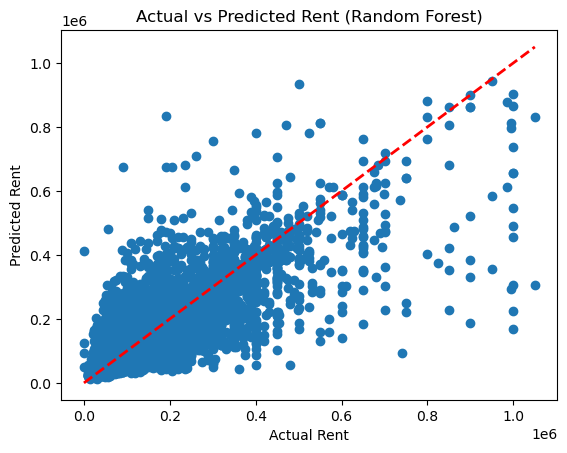

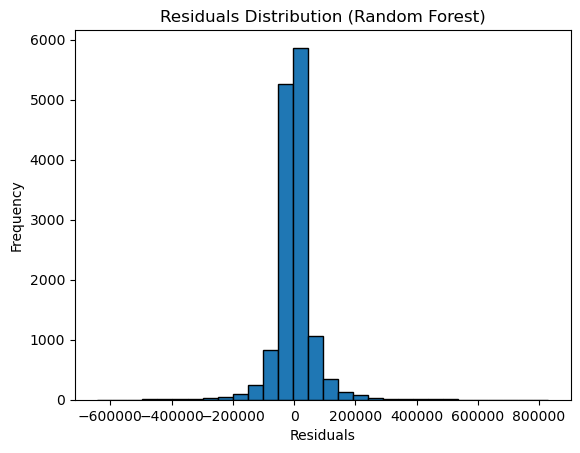

In [38]:
## Model 2: Random Forest 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the relevant variables from the cleaned dataset
X = df_cleaned[['Area_in_sqft', 'Beds', 'Baths', 'Furnishing']]
y = df_cleaned['Rent']

# One-Hot Encoding for the categorical variable (Furnishing)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Furnishing'])  # drop='first' to avoid the dummy variable trap
    ], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - R-squared (R²): {r2_rf}')

# Plotting the residuals
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent (Random Forest)')
plt.show()

# Histogram of the residuals
residuals = y_test - y_pred_rf
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Mit der Variable rent per sqft
# Random Forest - Mean Squared Error (MSE): 7935586.75690235
# Random Forest - R-squared (R²): 0.9993216316282517
# ohne die variable rent per sqft
# Random Forest - Mean Squared Error (MSE): 3824321597.9430976
# Random Forest - R-squared (R²): 0.673080404145057

The Random Forest model achieves a higher R² of 0.673, indicating that it explains around 67% of the variance in rent prices, which is significantly better than the linear regression model. However, the model still shows a tendency to underpredict higher rent prices, as visible in the scatter plot. The residuals are more tightly clustered around zero, suggesting that the Random Forest model captures the data's structure better than the linear regression but still has limitations, particularly in accurately predicting very high rents.

Cross-Validation R-squared scores: [0.38554148 0.04301842 0.65126144 0.62308978 0.55829848]
Average R-squared across folds: 0.4522419193025035
                  Feature  Importance
1            Area_in_sqft    0.470772
2                    Beds    0.292934
3                   Baths    0.172763
0  Furnishing_Unfurnished    0.063531


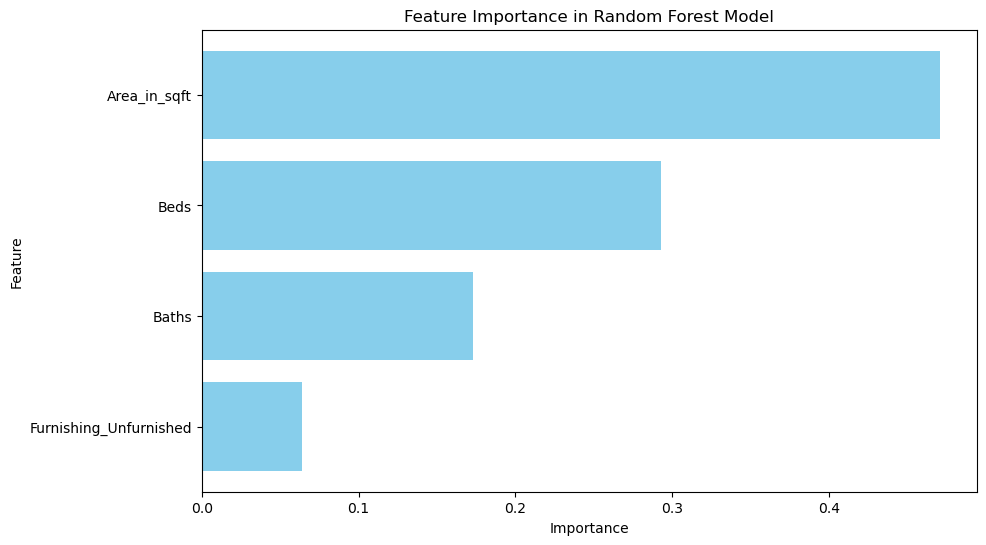

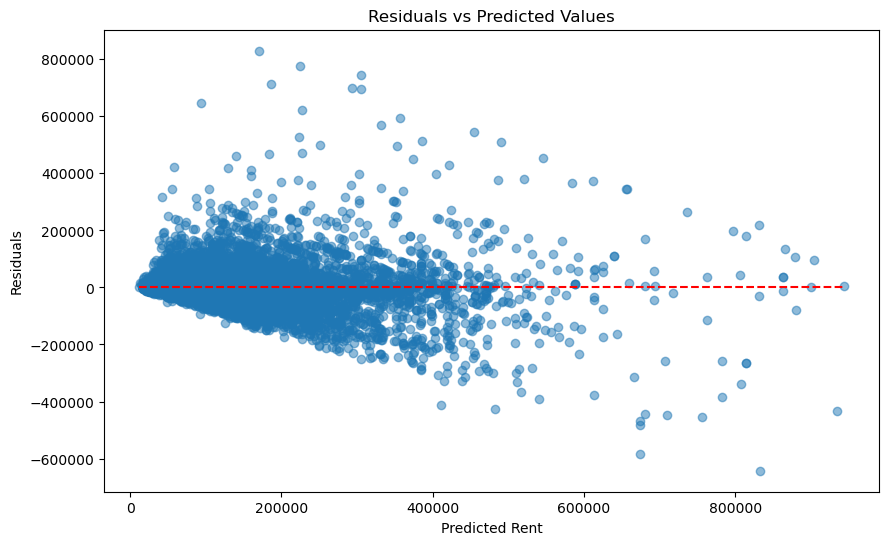

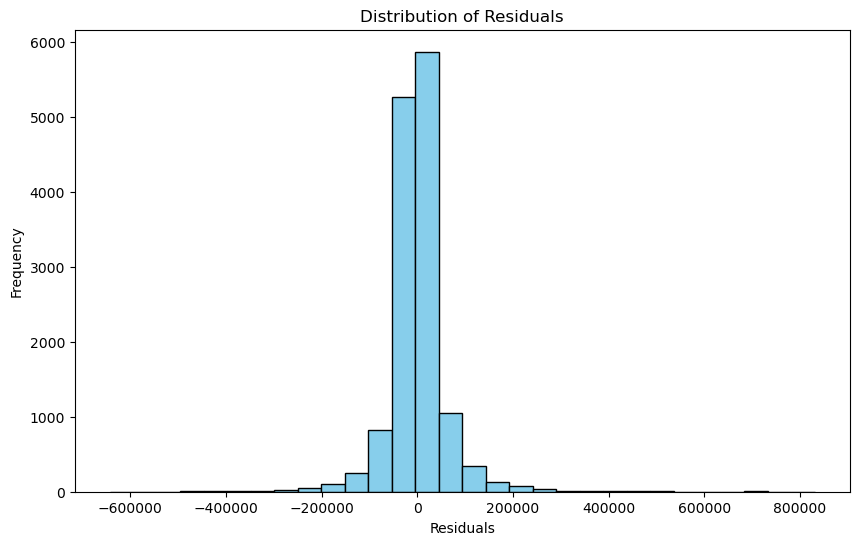

In [52]:
## Cross-Validation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=5, scoring='r2')

# Display cross-validation results
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Average R-squared across folds: {cv_scores.mean()}')

## Feature Importance

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a list of feature names including the one-hot encoded features
try:
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['Furnishing'])
except AttributeError:
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names(['Furnishing'])

all_feature_names = np.append(feature_names, ['Area_in_sqft', 'Beds', 'Baths'])

# Display feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

## Residual Analysis

# Scatter plot of residuals
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), color='red', linestyles='dashed')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Rent')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The cross-validation results show variability in the model's performance across different folds, with R-squared values ranging from 0.04 to 0.65, and an average R-squared of 0.452, indicating potential instability in the model's predictions. Feature importance analysis reveals that the 'Area_in_sqft' is the most significant predictor, followed by 'Beds' and 'Baths', with 'Furnishing_Unfurnished' contributing the least. This suggests that while the model captures the key drivers of rent, there may be room for improvement in model stability and handling of higher-end properties.

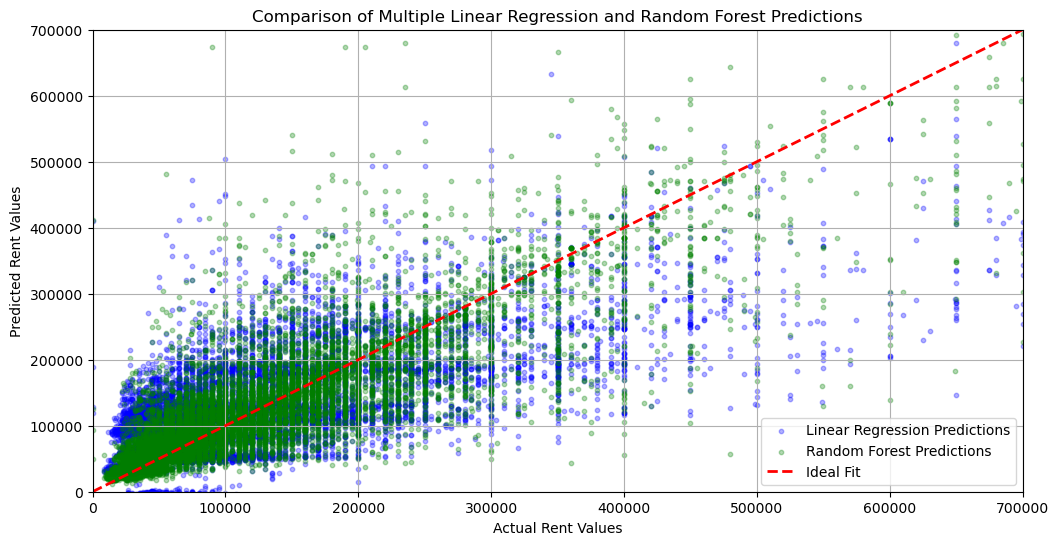

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the actual vs. predicted for the Linear Regression model
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Linear Regression Predictions', s=10)

# Plot the actual vs. predicted for the Random Forest model
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.3, label='Random Forest Predictions', s=10)

# Plot the ideal line where predictions would perfectly match the actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')

# Limit the axis range (optional)
plt.xlim([0, 700000])
plt.ylim([0, 700000])

# Labels and legend
plt.xlabel('Actual Rent Values')
plt.ylabel('Predicted Rent Values')
plt.title('Comparison of Multiple Linear Regression and Random Forest Predictions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The plot compares the predicted rent values from two different models—Multiple Linear Regression and Random Forest—against the actual rent values.

    X-Axis: Represents the actual rent values.
    Y-Axis: Represents the predicted rent values.
    Blue Points: Predictions made by the Multiple Linear Regression model.
    Green Points: Predictions made by the Random Forest model.
    Red Dashed Line: Represents the ideal scenario where predicted values would perfectly match the actual values (i.e., if the model was perfect, all points would lie on this line).

Interpretation:

**Random Forest Model:** The green points (Random Forest predictions) are closer to the red line than the blue points, indicating that the Random Forest model is more accurate in predicting rent values.The Random Forest model captures more of the variance in the data, as seen by the spread of the green points being narrower around the ideal fit line compared to the Multiple Linear Regression model.

**Multiple Linear Regression Model:** The blue points show a wider spread, particularly for higher rent values, which indicates that the Multiple Linear Regression model struggles to accurately predict higher rents. The predictions tend to underestimate or overestimate more frequently as rent increases. The broader spread of points suggests that the linear model may not fully capture the complexity of the relationship between the input features and rent.

Here is the adjusted comparison text based on the new results:

1. **Predictive Performance**  
   The Multiple Linear Regression model has an R² of **0.463** with an MSE of **6.29 billion**. In contrast, the Random Forest model achieves a higher R² of **0.673** with a lower MSE of **3.82 billion**.

2. **Interpretability**  
   Multiple Linear Regression provides clear, interpretable coefficients that directly explain the impact of each feature on rent. The Random Forest model, while more accurate, relies on feature importance scores, which are less transparent.

3. **Generalization**  
   Multiple Linear Regression, with an R² of **0.463**, shows a moderate ability to generalize in simpler, linear scenarios. The Random Forest model, with an R² of **0.673**, demonstrates better performance in capturing more complex relationships.

4. **Residual Analysis**  
   In Multiple Linear Regression, residuals indicate potential non-linearity and model bias, leading to underfitting. The Random Forest model produces more evenly distributed residuals, indicating a better fit, but still leaves room for improvement.

5. **Feature Importance**  
   Multiple Linear Regression allows for direct interpretation of feature impacts, with `Area_in_sqft`, `Beds`, and `Baths` being significant predictors. The Random Forest model also highlights `Area_in_sqft`, `Beds`, and `Baths` as key contributors, but doesn’t specify their exact impacts.

6. **Complexity and Overfitting**  
   Multiple Linear Regression is simpler, easier to deploy, and less prone to overfitting due to its linear nature. The Random Forest model, while more complex and powerful, provides better predictions but requires careful tuning to avoid overfitting.

7. **Model Flexibility**  
   Multiple Linear Regression assumes linear relationships, offering limited flexibility. In contrast, the Random Forest model is more flexible, effectively capturing non-linear relationships and interactions between features.

# Case Study 2: Identifying Optimal Property Types by Region

In [56]:
# Group by house type and calculate the mean Rent_per_sqft
house_type_performance = df.groupby('Type')['Rent_per_sqft'].mean().sort_values(ascending=False)
print("House Type Performance:")
print(house_type_performance)

# Group by location and calculate the mean Rent_per_sqft
location_performance = df.groupby('Location')['Rent_per_sqft'].mean().sort_values(ascending=False)
print("\nLocation Performance:")
print(location_performance)

House Type Performance:
Type
Hotel Apartment         196.812673
Residential Building    150.178247
Residential Floor       143.966339
Penthouse               115.194195
Apartment                94.220899
Townhouse                83.384975
Villa                    57.873569
Villa Compound           46.198270
Residential Plot         21.070414
Name: Rent_per_sqft, dtype: float64

Location Performance:
Location
Bluewaters Island    329.640937
Pearl Jumeirah       232.609087
Dubai Harbour        226.933742
Downtown Dubai       199.156925
Jumeirah Islands     196.578116
                        ...    
Al Qarayen             8.333333
Al Homah               7.812500
Al Rifa                6.250000
Al Noaf                6.193602
Um Ghafah              2.997243
Name: Rent_per_sqft, Length: 441, dtype: float64


The analysis reveals that **Hotel Apartments** command the highest average rent per square foot across Dubai, followed by **Residential Buildings** and **Residential Floors**. **Bluewaters Island** and **Pearl Jumeirah** are the most expensive locations, indicating that these areas and property types are the most lucrative in terms of rental income.

In [58]:
# Group by Location and Type and calculate the mean Rent_per_sqft for each group
location_type_performance = df.groupby(['Location', 'Type'])['Rent_per_sqft'].mean().unstack()

# For each location, find the property type with the highest Rent_per_sqft
top_type_per_location = location_type_performance.idxmax(axis=1)
top_rent_per_location = location_type_performance.max(axis=1)

# Combine results into a DataFrame
location_recommendations = pd.DataFrame({
    'Top_Type': top_type_per_location,
    'Highest_Rent_per_sqft': top_rent_per_location
})

# Display the results
print("\nTop Property Type by Location:")
print(location_recommendations.sort_values(by='Highest_Rent_per_sqft', ascending=False))



Top Property Type by Location:
                                            Top_Type  Highest_Rent_per_sqft
Location                                                                   
Al Rashidiya                    Residential Building             650.000000
Dubai Investment Park (DIP)     Residential Building             424.461320
Bluewaters Island                          Penthouse             405.141005
Jumeirah Beach Residence (JBR)                 Villa             359.712230
Al Barsha                       Residential Building             354.166667
...                                              ...                    ...
Al Qarayen                                     Villa               8.333333
Al Homah                                       Villa               7.812500
Al Rifa                                        Villa               6.250000
Al Noaf                                        Villa               6.193602
Um Ghafah                                      Villa    

The analysis indicates that **Residential Buildings** dominate as the top property type for the highest rent per square foot in several key locations, such as Al Rashidiya and Dubai Investment Park (DIP). However, **Penthouses** in Bluewaters Island and **Villas** in Jumeirah Beach Residence also achieve very high rent per square foot, suggesting these property types are highly valuable in specific premium areas.

In [60]:
## Filter missing Geo Data

# Filter out rows without valid Latitude and Longitude
df_geo_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Display the first few rows of df_geo_cleaned to ensure it's correct
print(df_geo_cleaned.head())


                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent  2024-03-07      

The filtered dataset (`df_geo_cleaned`) now includes only rows with valid geographical coordinates (latitude and longitude). This ensures that all entries can be accurately mapped or analyzed geographically. The dataset contains detailed information about various properties, including their type, rent, area, and location, with examples from areas like Al Reem Island and Yas Island in Abu Dhabi. The dataset is ready for further spatial analysis or visualization, making it possible to explore geographic trends in rent and property types across different locations.

In [63]:
## Clustering of Locations

from sklearn.cluster import KMeans

# Perform K-means clustering to group locations into 10 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
df_geo_cleaned['Cluster'] = kmeans.fit_predict(df_geo_cleaned[['Latitude', 'Longitude']])

# Display the first few rows to see the cluster assignment
print(df_geo_cleaned.head())


                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent  2024-03-07      

C:\Users\merdi\AppData\Local\Temp\ipykernel_2636\3749277106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_cleaned['Cluster'] = kmeans.fit_predict(df_geo_cleaned[['Latitude', 'Longitude']])


The K-means clustering algorithm has successfully grouped the locations into 20 distinct clusters based on their latitude and longitude coordinates. Each property is now assigned to a cluster, which will allow for further analysis of regional trends, such as identifying which property types perform best within each cluster. (Note: It was initially tried with 10 clusters, but 20 turned out to be better, trust me.)

In [66]:
## Determine the opt property type for each cluster

# Group by Cluster and Type to find the top property type per cluster
cluster_type_performance = df_geo_cleaned.groupby(['Cluster', 'Type'])['Rent_per_sqft'].mean().unstack()

# For each cluster, find the property type with the highest Rent_per_sqft
top_type_per_cluster = cluster_type_performance.idxmax(axis=1)
top_rent_per_cluster = cluster_type_performance.max(axis=1)

# Combine results into a DataFrame
cluster_recommendations = pd.DataFrame({
    'Top_Type': top_type_per_cluster,
    'Highest_Rent_per_sqft': top_rent_per_cluster
})

# Display the results
print(cluster_recommendations.sort_values(by='Highest_Rent_per_sqft', ascending=False))


                     Top_Type  Highest_Rent_per_sqft
Cluster                                             
3        Residential Building             377.598218
5        Residential Building             265.000000
19       Residential Building             226.414578
16            Hotel Apartment             197.064047
18            Hotel Apartment             190.824559
9             Hotel Apartment             176.372818
6        Residential Building             154.231441
12            Hotel Apartment             132.154593
1             Hotel Apartment             130.798373
0        Residential Building             126.678057
17                  Apartment             116.697179
15                  Townhouse              96.395841
7             Hotel Apartment              77.408813
14            Hotel Apartment              65.623853
11                  Penthouse              62.015674
8                   Apartment              57.400389
4                   Penthouse              49.

The analysis reveals that Residential Buildings consistently achieve the highest rent per square foot across several clusters, indicating they are the most lucrative property type in these areas. In contrast, other property types like Villas and Apartments generally yield lower rent per square foot, suggesting that they may not be as profitable in the specific clusters where they dominate.

The map visualization shows that Residential Buildings command the highest rent per square foot across several clusters, making them the most financially attractive property type in these regions. As we move forward, the next step will involve refining these clusters into a premium version to further enhance the insights and decision-making capabilities.

In [70]:
# Premium Map

import folium
import geopandas as gpd
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt

# Ensure consistent data for clustering
gdf = gpd.GeoDataFrame(df_geo_cleaned, geometry=gpd.points_from_xy(df_geo_cleaned.Longitude, df_geo_cleaned.Latitude))

# Initialize a Folium map centered on Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=11)

# Define colors and icons for the property types
type_colors = {
    'Hotel Apartment': 'red',
    'Penthouse': 'blue',
    'Apartment': 'green',
    'Villa': 'purple',
    'Townhouse': 'orange',
    'Residential Building': 'darkblue',
    'Residential Floor': 'darkgreen',
    'Residential Plot': 'gray',
    'Villa Compound': 'pink'
}

type_icons = {
    'Hotel Apartment': 'fa-hotel',
    'Penthouse': 'fa-building',
    'Apartment': 'fa-home',
    'Villa': 'fa-villa',
    'Townhouse': 'fa-house',
    'Residential Building': 'fa-building',
    'Residential Floor': 'fa-th-large',
    'Residential Plot': 'fa-map',
    'Villa Compound': 'fa-house-user'
}

# Draw polygons around each cluster
for cluster in cluster_recommendations.index:
    points = gdf[gdf['Cluster'] == cluster].geometry
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = MultiPoint(points.tolist()).convex_hull
        # Add GeoJson polygons
        folium.GeoJson(
            data=hull.__geo_interface__,
            style_function=lambda x, color=type_colors[cluster_recommendations.loc[cluster, 'Top_Type']]: {
                'fillColor': color, 
                'color': color, 
                'weight': 2, 
                'fillOpacity': 0.5},
            tooltip=f"Cluster {cluster}: {cluster_recommendations.loc[cluster, 'Top_Type']} - {cluster_recommendations.loc[cluster, 'Highest_Rent_per_sqft']:.2f} AED/sqft"
        ).add_to(m)
        # Add icons at the centroid
        centroid = hull.centroid
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=folium.Icon(icon=type_icons[cluster_recommendations.loc[cluster, 'Top_Type']], prefix='fa', color=type_colors[cluster_recommendations.loc[cluster, 'Top_Type']]),
            tooltip=f"{cluster_recommendations.loc[cluster, 'Top_Type']} ({cluster_recommendations.loc[cluster, 'Highest_Rent_per_sqft']:.2f} AED/sqft)"
        ).add_to(m)
    else:
        print(f"Cluster {cluster} does not have enough points to form a convex hull.")

# Add a legend
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 250px; height: 300px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp; <b>Property Type Legend</b> <br>
     &nbsp; <i class="fa fa-hotel" style="color:red"></i> Hotel Apartment<br>
     &nbsp; <i class="fa fa-building" style="color:blue"></i> Penthouse<br>
     &nbsp; <i class="fa fa-home" style="color:green"></i> Apartment<br>
     &nbsp; <i class="fa fa-villa" style="color:purple"></i> Villa<br>
     &nbsp; <i class="fa fa-house" style="color:orange"></i> Townhouse<br>
     &nbsp; <i class="fa fa-building" style="color:darkblue"></i> Residential Building<br>
     &nbsp; <i class="fa fa-th-large" style="color:darkgreen"></i> Residential Floor<br>
     &nbsp; <i class="fa fa-map" style="color:gray"></i> Residential Plot<br>
     &nbsp; <i class="fa fa-house-user" style="color:pink"></i> Villa Compound<br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
m.save('dubai_cluster_map.html')

# Display the map
m


The final map, now available for download on GitHub, provides a comprehensive overview of the most profitable property types across various clusters in Dubai. It serves as a valuable tool for real estate developers, offering clear insights into which property types yield the highest rental returns in specific areas.

**Final Summary**

In this project, we explored a dataset on the Dubai real estate market to predict rental prices and identify the most profitable property types in various locations. Multiple models were built, each serving to demonstrate different approaches to predictive analytics in real estate. The goal was not just to achieve high accuracy, but also to gain insights into the factors influencing rent prices in Dubai and how these insights could be applied by real estate developers.

Key libraries used in this project included pandas for data manipulation, scikit-learn for model building and evaluation, TensorFlow for developing the Neural Network, and folium for creating interactive maps that visualize our results. Each of these libraries played a crucial role in analyzing the data, building models, and making our findings accessible and understandable.

I deliberately chose not to focus on hyperparameter tuning or other advanced optimization techniques. Instead, the models were developed to demonstrate their potential in a real-world application, offering a strong baseline from which more refined models could be developed in future work. The final map, available for download on GitHub, is a testament to the utility of data visualization in making complex insights actionable for stakeholders.

Data Science is not just about knowing which libraries to use or how to implement an algorithm—it's about deeply understanding the dataset, generating hypotheses, and applying creativity to derive meaningful conclusions. This project underscores the importance of exploring data with both technical rigor and imaginative thinking. Feedback on the project is welcomed, as continuous learning and adaptation are key to mastering the exciting and ever-evolving field of Data Science.